
# K Means Clustering 

In this notebook we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

___
**We actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.** 

Therefore, the classification report and confusion matrix at the end is not applicable in a real-world scenario
___

## The Data

We will use a data frame with 777 observations on the following 18 variables.
* Private -  A factor with levels No and Yes indicating private or public university
* Apps -  Number of applications received
* Accept -  Number of applications accepted
* Enroll -  Number of new students enrolled
* Top10perc -  Pct. new students from top 10% of H.S. class
* Top25perc -  Pct. new students from top 25% of H.S. class
* F.Undergrad -  Number of fulltime undergraduates
* P.Undergrad -  Number of parttime undergraduates
* Outstate -  Out-of-state tuition
* Room.Board -  Room and board costs
* Books -  Estimated book costs
* Personal -  Estimated personal spending
* PhD -  Pct. of faculty with Ph.D.’s
* Terminal -  Pct. of faculty with terminal degree
* S.F.Ratio -  Student/faculty ratio
* perc.alumni -  Pct. alumni who donate
* Expend -  Instructional expenditure per student
* Grad.Rate -  Graduation rate

## Import Libraries

** Import the libraries you usually use for data analysis.**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [56]:
college_data = pd.read_csv('../../data/college_data.csv',index_col=0)
college_data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Check the head of the data**

** Check the info() and describe() methods on the data.**

## Exploratory Data Analysis


** Scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column. **

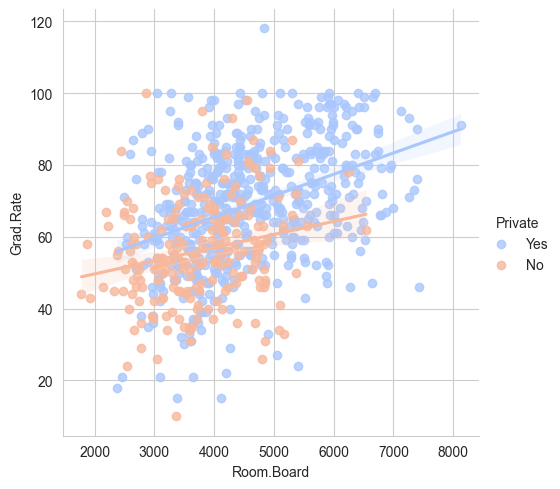

In [57]:
sns.set_style('whitegrid')
sns.lmplot(x='Room.Board', y='Grad.Rate', data=college_data, hue='Private',palette='coolwarm')

**Scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

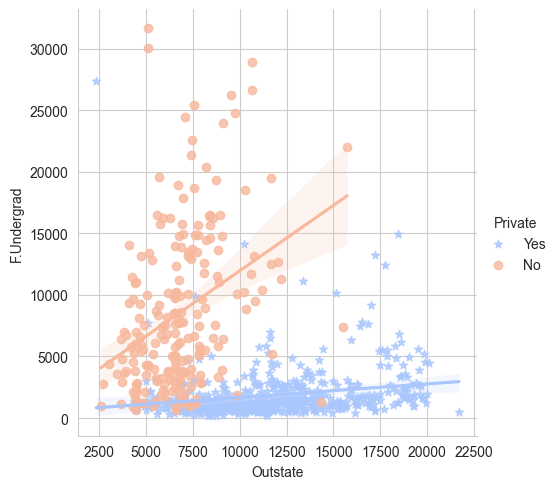

In [58]:
sns.lmplot(x='Outstate', y='F.Undergrad', data=college_data, hue='Private', palette='coolwarm', markers=['*','o'])

** Stacked histogram showing Out of State Tuition based on the Private column.

<Axes: xlabel='Outstate', ylabel='Count'>

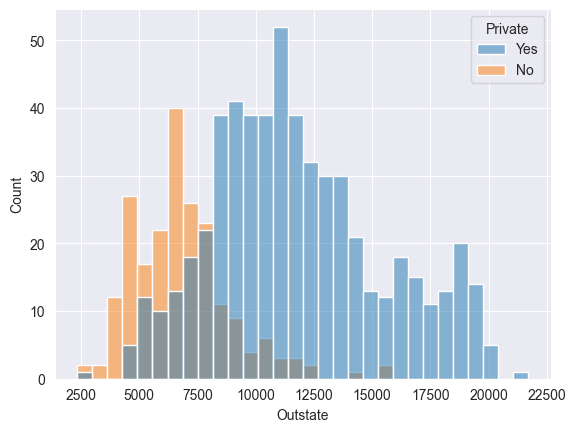

In [59]:
sns.set_style('darkgrid')
sns.histplot(data=college_data, x='Outstate', hue='Private', bins=30)

**Similar histogram for the Grad.Rate column.**

<Axes: xlabel='Grad.Rate', ylabel='Count'>

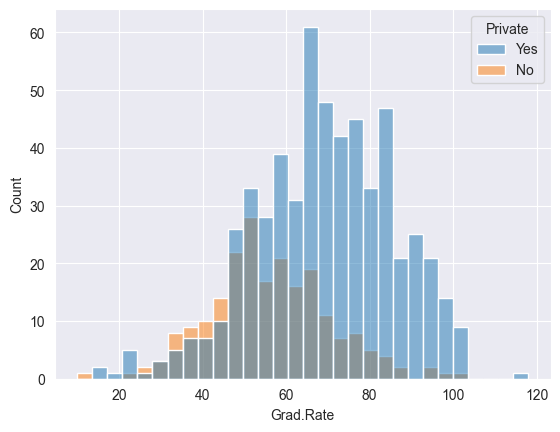

In [60]:
sns.set_style('darkgrid')
sns.histplot(data=college_data, x='Grad.Rate', hue='Private', bins=30)

** Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?**

In [61]:
college_data[college_data['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


** Set that school's graduation rate to 100 and re-do the histogram visualization to make sure it actually went through.**

In [62]:
college_data.loc['Cazenovia College', 'Grad.Rate'] = 100

<Axes: xlabel='Grad.Rate', ylabel='Count'>

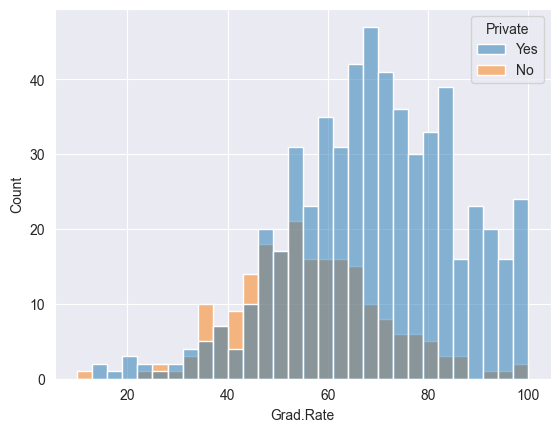

In [63]:
sns.set_style('darkgrid')
sns.histplot(data=college_data, x='Grad.Rate', hue='Private', bins=30)

## K Means Cluster Creation

**K Means model with 2 clusters.**

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
X = college_data.drop('Private', axis=1)
kmeans.fit(X)

KMeans(n_clusters=2)

**Cluster center vectors**

In [65]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

## Evaluation

There is no perfect way to evaluate clustering if we don't have the labels, however since this is just a demo, we do have the labels to evaluate our clusters. 

** Let's create a new column for college_data called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [66]:
college_data['Cluster'] = college_data['Private'].apply(lambda x: 1 if x == 'Yes' else 0)
college_data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


** Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(college_data['Cluster'], kmeans.labels_))
print(classification_report(college_data['Cluster'], kmeans.labels_))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

